In [1]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install music21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.9 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
import re
import music21

In [5]:
# from music21 import converter, note, chord

# # Function to extract notes and durations as a text string
# def midi_to_text(midi_file):
#     # Parse the MIDI file
#     midi_data = converter.parse(midi_file)
#     notes_string = ""

#     # Iterate through all notes and chords in the MIDI file
#     for element in midi_data.flat.notes:
#         if isinstance(element, note.Note):  # If it's a single note
#             pitch = element.nameWithOctave  # e.g., "C5"
#             duration = 1.0
#             # duration = element.quarterLength  # Duration in quarter lengths
#             # if duration <= 1.0:
#             #     duration = 1.0
#             # else:
#             #     duration = 2.0
#             # notes_string += f"{pitch}--{round(float(duration),1)} "  # Append as "C5,1.0 "
#         elif isinstance(element, chord.Chord):  # If it's a chord
#             # For simplicity, take the root note of the chord
#             # pitches = "+".join(n.nameWithOctave for n in element.notes)
#             pitch = element.root().nameWithOctave
#             duration = 1.0
#             notes_string += f"{pitch}--{round(float(duration),1)} "

#     # Remove trailing whitespace
#     notes_string = notes_string.strip()

#     return notes_string

# # midi_file = "/kaggle/input/classical-music-midi/chopin/chpn_op35_3.mid"  # Path to your MIDI file
# # notes_text = midi_to_text(midi_file)
# # print(notes_text)  # Example output: "C4+E4+G4,1.0 D5,0.5 G4+Bb4,2.0"

In [6]:
# # Define the dataset directory and output CSV file
# dataset_path = '/kaggle/input/classical-music-midi'
# output_csv = '/kaggle/working/classical_music_text.csv'

# # Collect all MIDI files
# midi_files = []
# for root, _, files in os.walk(dataset_path):
#     for file in files:
#         if file.endswith('.mid'):
#             midi_files.append(os.path.join(root, file))

# # Process each MIDI file and collect the results
# data = []
# for midi_file in midi_files:
#     try:
#         text = midi_to_text(midi_file)
#         data.append({"file_path": midi_file, "text": text})
#     except Exception as e:
#         print(f"Error processing {midi_file}: {e}")

# df = pd.DataFrame(data)mid'):
#             midi_files.append(os.path.join(root, file))

# df = pd.DataFrame(data)

In [7]:
import glob

# Define the path to the folder containing the text files
folder_path = '/kaggle/input/essen-folksong-database-conversion-and-tokenization/04_Extracted data (tokenizer OctupleMono)/Pitch'

# Use glob to find all text files in the folder
text_files = glob.glob(f"{folder_path}/*.txt")

# Initialize an empty list to store the contents
file_contents = []

# Loop through the files and read their contents
for file_path in text_files:
    with open(file_path, 'r') as file:
        # Read the file content and append it to the list
        file_contents.append(file.read())

# Print or process the file contents as needed
print(file_contents[1])


67 66 67 66 67 69 71 67 74 73 74 73 74 67 66 67 66 67 69 71 67 72 71 72 74 76 79 79 74 71 74 72 69 67


In [8]:
text_data = ' <|endoftext|> '.join(file_contents) + ' <|endoftext|>'
list_of_words = re.split(r'(\s)', text_data)
list_of_words = [item for item in list_of_words if item.strip()]
all_words = sorted(set(list_of_words))
all_words.extend(["<|unk|>"])
vocab_size = len(all_words)
print(vocab_size)

54


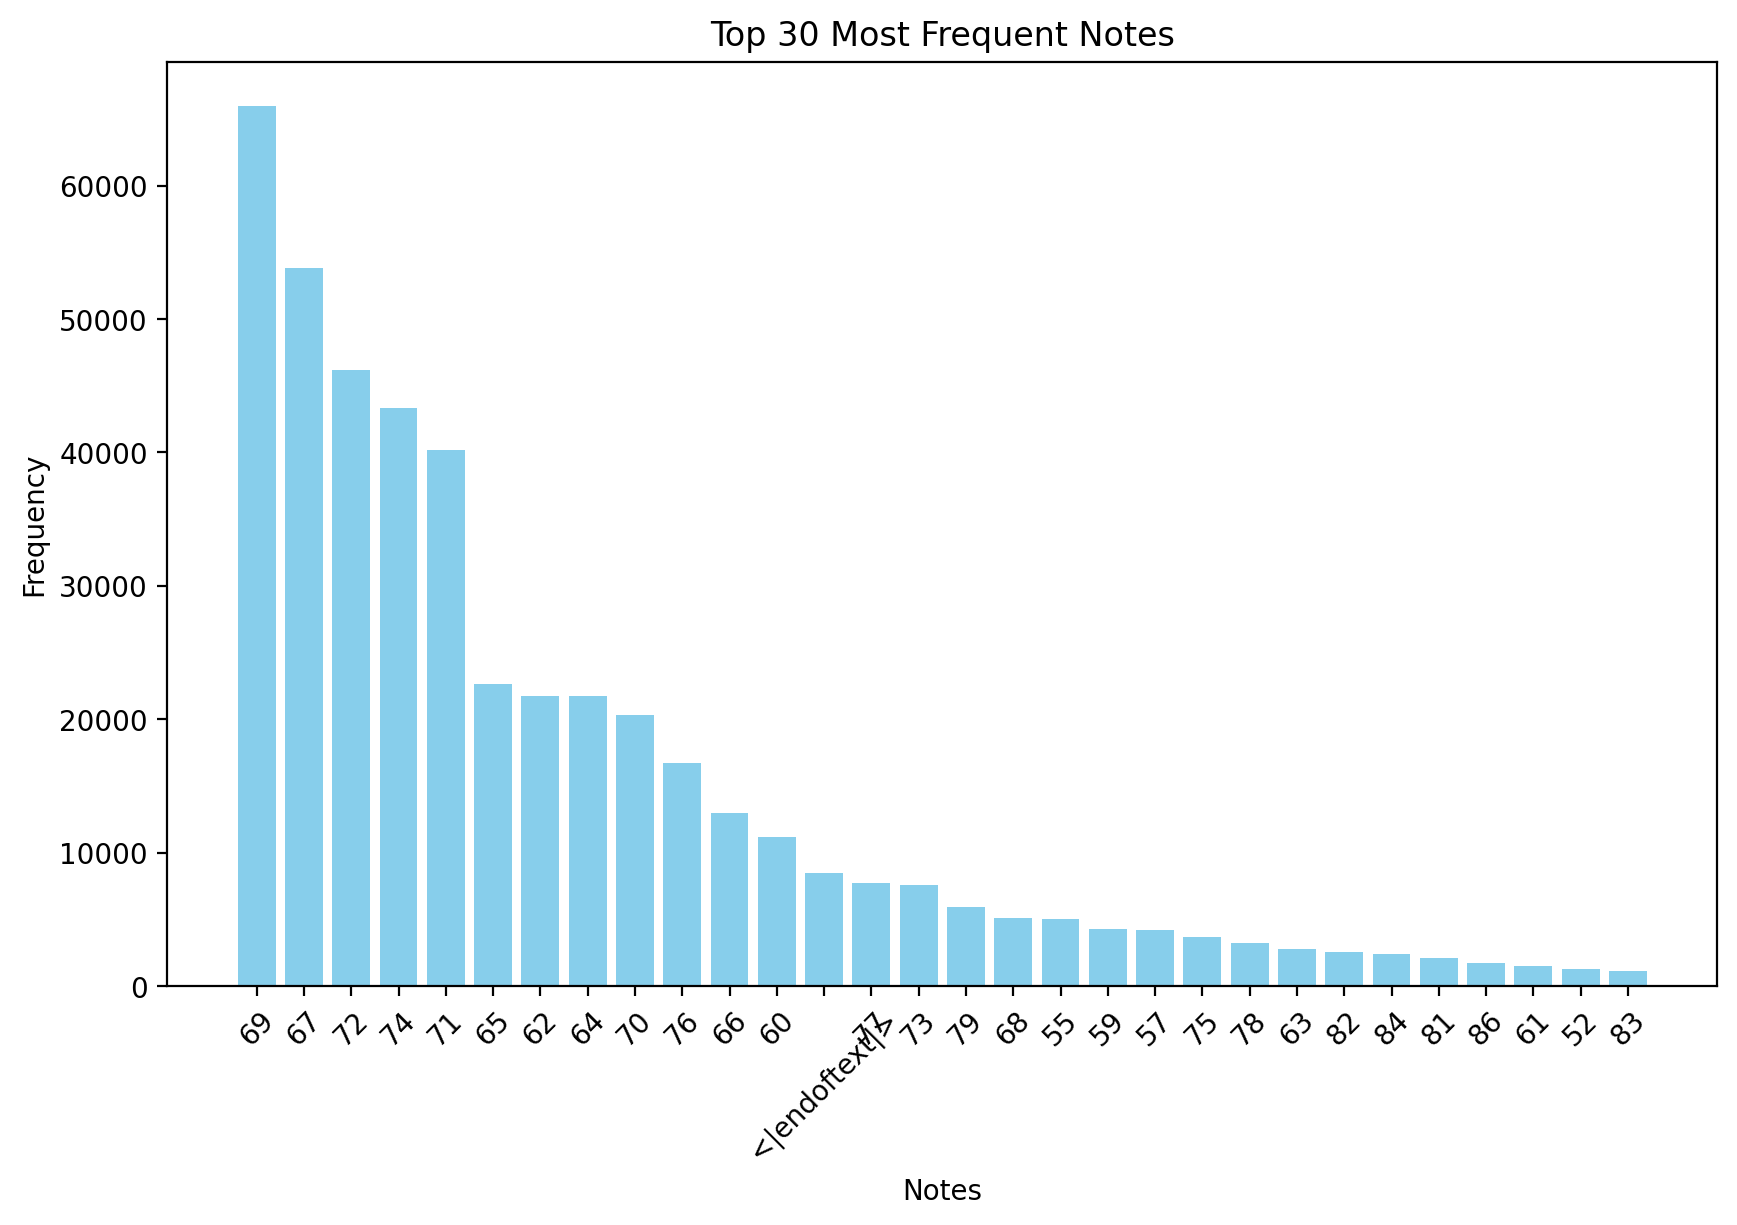

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

# Count frequencies
counter = Counter(list_of_words)

# Get the 30 most common items
most_common = counter.most_common(30)

# Separate items and counts
items, counts = zip(*most_common)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(items, counts, color="skyblue")
plt.xlabel("Notes")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Notes")
plt.xticks(rotation=45)
plt.show()


In [10]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 10:
        break

('45', 0)
('46', 1)
('47', 2)
('48', 3)
('49', 4)
('50', 5)
('51', 6)
('52', 7)
('53', 8)
('54', 9)
('55', 10)


In [11]:
class MidiTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'(\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        return text

In [12]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt)

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [13]:
def create_dataloader_v1(txt, batch_size=4, max_length=1024, 
                         stride=512, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = MidiTokenizerV1(vocab)

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [14]:
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by n_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)  # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.reshape(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)  # optional projection

        return context_vec

In [15]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift


class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)   # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed-forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x


class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


In [16]:
def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    # gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])

    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])


In [17]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [18]:
from importlib.metadata import version

pkgs = ["matplotlib", 
        "numpy", 
        "torch",
        "tensorflow" # For OpenAI's pretrained weights
       ]
for p in pkgs:
    print(f"{p} version: {version(p)}")

matplotlib version: 3.7.5
numpy version: 1.26.4
torch version: 2.4.0
tensorflow version: 2.16.1


In [19]:
import torch

# GPT_CONFIG_124M = {
#     "vocab_size": vocab_size,   # Vocabulary size
#     "context_length": 1024, # Shortened context length (orig: 1024)
#     "emb_dim": 768,        # Embedding dimension
#     "n_heads": 12,         # Number of attention heads
#     "n_layers": 12,        # Number of layers
#     "drop_rate": 0.0,      # Dropout rate
#     "qkv_bias": False      # Query-key-value bias
# }

# torch.manual_seed(123)
# model = GPTModel(GPT_CONFIG_124M)
# model.eval();  # Disable dropout during inference

In [20]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "/kaggle/input/gpt-download/pytorch/default/1/gpt_download.py", dst = "/kaggle/working/gpt_download.py")

'/kaggle/working/gpt_download.py'

In [21]:
from gpt_download import download_and_load_gpt2
# from previous_chapters import GPTModel, load_weights_into_gpt


BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-medium (355M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [22]:
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=BASE_CONFIG["context_length"],
    stride=BASE_CONFIG["context_length"]//2,
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=BASE_CONFIG["context_length"],
    stride=BASE_CONFIG["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [23]:
tokenizer = MidiTokenizerV1(vocab)
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 1452991
Tokens: 453274


In [24]:
import numpy as np

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(
    model_size=model_size,
    models_dir="gpt2"
)

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 55.2kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 3.56MiB/s]
hparams.json: 100%|██████████| 91.0/91.0 [00:00<00:00, 57.5kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 1.42G/1.42G [00:43<00:00, 32.6MiB/s]
model.ckpt.index: 100%|██████████| 10.4k/10.4k [00:00<00:00, 6.81MiB/s]
model.ckpt.meta: 100%|██████████| 927k/927k [00:00<00:00, 3.46MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 2.09MiB/s]


In [25]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 1024)
  (pos_emb): Embedding(1024, 1024)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=1024, out_features=1024, bias=True)
        (W_key): Linear(in_features=1024, out_features=1024, bias=True)
        (W_value): Linear(in_features=1024, out_features=1024, bias=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU()
          (2): Linear(in_features=4096, out_features=1024, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(i

In [26]:
# for param in model.parameters():
#     param.requires_grad = False

In [27]:
torch.manual_seed(123)

model.tok_emb = nn.Embedding(vocab_size, BASE_CONFIG["emb_dim"])

In [28]:
torch.manual_seed(123)

model.out_head = nn.Linear(in_features=BASE_CONFIG["emb_dim"], out_features = vocab_size, bias = False)

In [29]:
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True
for param in model.final_norm.parameters():
    param.requires_grad = True

In [30]:
print(model)

GPTModel(
  (tok_emb): Embedding(54, 1024)
  (pos_emb): Embedding(1024, 1024)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=1024, out_features=1024, bias=True)
        (W_key): Linear(in_features=1024, out_features=1024, bias=True)
        (W_value): Linear(in_features=1024, out_features=1024, bias=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU()
          (2): Linear(in_features=4096, out_features=1024, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_f

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [32]:
# print("Train loader:")
# for x, y in train_loader:
#     print(x.shape, y.shape)

# print("\nValidation loader:")
# for x, y in val_loader:
#     print(x.shape, y.shape)

In [33]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 813056
Validation tokens: 45056
All tokens: 858112


In [34]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [35]:
import gc
# Run garbage collection
gc.collect()

# Clear CUDA cache
torch.cuda.empty_cache()

In [36]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 8.160725859010249
Validation loss: 7.826792240142822


In [37]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        # generate_and_print_sample(
        #     model, tokenizer, device, start_context
        # )

    return train_losses, val_losses, track_tokens_seen

In [38]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss


# def generate_and_print_sample(model, tokenizer, device, start_context):
#     model.eval()
#     context_size = model.pos_emb.weight.shape[0]
#     encoded = text_to_token_ids(start_context, tokenizer).to(device)
#     with torch.no_grad():
#         token_ids = generate_text_simple(
#             model=model, idx=encoded,
#             max_new_tokens=50, context_size=context_size
#         )
#     decoded_text = token_ids_to_text(token_ids, tokenizer)
#     print(decoded_text.replace("\n", " "))  # Compact print format
#     model.train()

In [39]:
torch.manual_seed(123)
# torch.backends.cuda.matmul.allow_tf32 = True
# model = GPTModel(BASE_CONFIG)
# model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="C4-1.0", tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 11.776, Val loss 13.459
Ep 1 (Step 000005): Train loss 4.520, Val loss 4.476
Ep 1 (Step 000010): Train loss 3.618, Val loss 3.587
Ep 1 (Step 000015): Train loss 3.408, Val loss 3.409
Ep 1 (Step 000020): Train loss 3.301, Val loss 3.301
Ep 1 (Step 000025): Train loss 3.148, Val loss 3.267
Ep 1 (Step 000030): Train loss 3.134, Val loss 3.178
Ep 1 (Step 000035): Train loss 3.128, Val loss 3.105
Ep 1 (Step 000040): Train loss 3.063, Val loss 3.069
Ep 1 (Step 000045): Train loss 2.956, Val loss 3.040
Ep 1 (Step 000050): Train loss 3.015, Val loss 3.025
Ep 1 (Step 000055): Train loss 2.916, Val loss 3.026
Ep 1 (Step 000060): Train loss 2.956, Val loss 2.997
Ep 1 (Step 000065): Train loss 2.833, Val loss 2.987
Ep 1 (Step 000070): Train loss 2.897, Val loss 2.984
Ep 1 (Step 000075): Train loss 2.837, Val loss 2.974
Ep 1 (Step 000080): Train loss 3.039, Val loss 2.971
Ep 1 (Step 000085): Train loss 2.887, Val loss 2.963
Ep 1 (Step 000090): Train loss 2.924, Val lo

In [40]:
# for param in model.parameters():
#     param.requires_grad = True

In [41]:
# torch.manual_seed(123)
# # model = GPTModel(BASE_CONFIG)
# # model.to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

# num_epochs = 2
# train_losses, val_losses, tokens_seen = train_model_simple(
#     model, train_loader, val_loader, optimizer, device,
#     num_epochs=num_epochs, eval_freq=5, eval_iter=5,
#     start_context="C4-1.0", tokenizer=tokenizer
# )

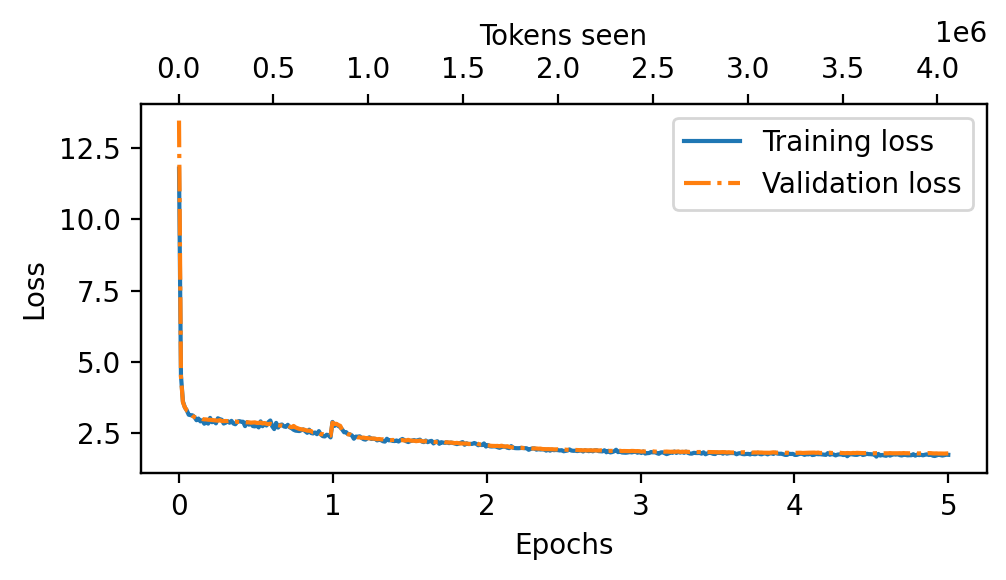

In [42]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [43]:
# import math

# def compute_perplexity(data_loader, model, device, num_batches=None):
#     """
#     Compute the perplexity for a given data loader and model.

#     Args:
#         data_loader: The data loader (train or validation).
#         model: The trained model.
#         device: The device (CPU or CUDA).
#         num_batches: Number of batches to compute over (optional).

#     Returns:
#         perplexity: The perplexity score.
#     """
#     # Calculate the average cross-entropy loss using your existing function
#     avg_loss = calc_loss_loader(data_loader, model, device, num_batches)
    
#     # Convert the loss to perplexity
#     perplexity = torch.exp(avg_loss)
#     return perplexity

# # Example usage after training
# #train_perplexity = compute_perplexity(train_loader, model, device)
# val_perplexity = compute_perplexity(val_loader, model, device)

# #print(f"Train Perplexity: {train_perplexity:.2f}")
# print(f"Validation Perplexity: {val_perplexity:.2f}")


In [44]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [55]:
vocab["<|endoftext|>"]

52

In [60]:
torch.manual_seed(123)

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text)
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

# start_context = "Every effort moves you"

token_ids = generate(
    model=model,
    idx=text_to_token_ids("68 66 64 61 64 66 68", tokenizer).to(device),
    max_new_tokens=100,
    context_size=BASE_CONFIG["context_length"],
    top_k=7,
    temperature=1.2,
    eos_id= 52
)

notes_text=token_ids_to_text(token_ids, tokenizer)

print(notes_text)

68 66 64 61 64 66 68 66 68 69 71 66 64 66 69 66 66 68 71 73 71 68 66 66 68 69 68 66 71 73 68 71 68 64 68 71 73 73 69 66 68 66 71 66 64 64 64 61 61 61 73 76 68 66 68 71 68 68 71 68 64 73 71 71 71 69 68 71 73 76 68 69 64 64 64 64 64 66 64 68 69 68 71 76 64 66 64 61 64 64 64 61 57 64 64 64 64 66 66 64


In [61]:
from music21 import stream, note

def pitch_sequence_to_midi(pitch_sequence, output_midi_file="output.mid", note_duration=1.0):
    """
    Converts a pitch sequence into a MIDI file.

    Args:
        pitch_sequence (str): A string of space-separated pitch values (e.g., "67 66 67").
        output_midi_file (str): Path to save the resulting MIDI file.
        note_duration (float): Duration for each note (in quarter lengths).

    Returns:
        None: The function saves the MIDI file to the specified path.
    """
    # Parse the pitch sequence into a list of integers
    pitches = [int(p) for p in pitch_sequence.split() if p != "<|endoftext|>"]

    # pitches = list(map(int, pitch_sequence.split()))
    
    # Create a music21 Stream to hold the notes
    midi_stream = stream.Stream()

    for pitch in pitches:
        # Create a Note object for each pitch
        new_note = note.Note(pitch)
        new_note.quarterLength = note_duration  # Assign duration
        midi_stream.append(new_note)

    # Save the stream as a MIDI file
    midi_stream.write("midi", fp=output_midi_file)
    print(f"MIDI file saved as {output_midi_file}")

# Example usage
pitch_sequence = notes_text
pitch_sequence_to_midi(pitch_sequence, output_midi_file="pitch_sequence_output.mid")


MIDI file saved as pitch_sequence_output.mid


In [47]:
# from music21 import stream, note, chord

# # Function to convert text with chords back to MIDI
# def text_with_chords_to_midi(notes_text, output_midi_file="output_with_chords.mid"):
#     """
#     Convert a string of notes and chords back into a MIDI file.

#     Args:
#         notes_text (str): Text representation of notes and chords.
#         output_midi_file (str): Path to save the resulting MIDI file.

#     Returns:
#         None: The function saves the MIDI file to the specified path.
#     """
#     midi_stream = stream.Stream()

#     # Split the text into note/chord-duration pairs
#     note_pairs = notes_text.split()

#     for pair in note_pairs:
#         pitches, duration = pair.split('--')  # Separate pitches and duration
#         duration = float(duration)  # Convert duration to float

#         if "+" in pitches:  # It's a chord
#             pitch_list = pitches.split("+")  # Split pitches (e.g., "C4+E4+G4")
#             new_chord = chord.Chord(pitch_list)  # Create a Chord object
#             new_chord.quarterLength = duration
#             midi_stream.append(new_chord)
#         else:  # It's a single note
#             new_note = note.Note(pitches)
#             new_note.quarterLength = duration
#             midi_stream.append(new_note)

#     # Save the stream as a MIDI file
#     midi_stream.write("midi", fp=output_midi_file)
#     print(f"MIDI file saved as {output_midi_file}")

# # Example usage
# # notes_text = "C4+E4+G4,1.0 D5,0.5 G4+Bb4,2.0"
# text_with_chords_to_midi(notes_text, output_midi_file="example_with_chords_output.mid")

In [48]:
# torch.manual_seed(123)
# # torch.backends.cuda.matmul.allow_tf32 = True
# # model = GPTModel(BASE_CONFIG)
# # model.to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.00005, weight_decay=0.1)

# num_epochs = 5
# train_losses, val_losses, tokens_seen = train_model_simple(
#     model, train_loader, val_loader, optimizer, device,
#     num_epochs=num_epochs, eval_freq=5, eval_iter=5,
#     start_context="C4-1.0", tokenizer=tokenizer
# )

In [49]:
# for name, param in model.named_parameters():
#     print(f"Layer: {name}, Trainable: {param.requires_grad}")

In [50]:
file_name = f"{re.sub(r'[ ()]', '', CHOOSE_MODEL) }-sft_midi_5.pth"
torch.save(model.state_dict(), file_name)
print(f"Model saved as {file_name}")

Model saved as gpt2-medium355M-sft_midi_5.pth
